1. Implement Linear Regression and calculate sum of residual error on the following  Datasets.  
 x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  
 y = [1, 3, 2, 5, 7, 8, 8, 9, 10, 12]  

*    Compute the regression coefficients using analytic formulation and calculate Sum  Squared Error (SSE) and R2 value.
*   Implement gradient descent (both Full-batch and Stochastic with stopping  criteria) on Least Mean Square loss formulation to compute the coefficients of  regression matrix and compare the results using performance measures such as R2 SSE etc.



In [21]:
import numpy as np
import matplotlib.pyplot as plt


In [22]:
x= np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([1,3,2,5,7,8,8,9,10,12])

n = np.size(x)

one = np.ones(n)
X = np.array([one, x,np.square(x)])
X_T=np.transpose(X)
Y_T=np.transpose(y)

X_X_T = X.dot(X_T)
X_Y_T = X.dot(Y_T)

X_X_T_Inv = np.linalg.inv(X_X_T)

beta = X_X_T_Inv.dot(X_Y_T)


In [23]:
def plot_regression_line(x,y,b):
  plt.scatter(x,y,color ="m", marker = "o", s=40)
  y_pred = b[0]+ b[1]*x + b[2]*x**2
  plt.plot(x,y_pred,color ="g")

  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()


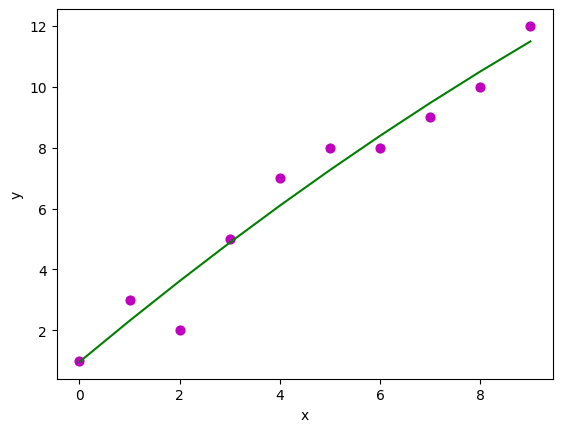

In [24]:
plot_regression_line(x,y,beta)

In [25]:
def estimated_coeff(x,y):
  beta1=0
  beta0=0
  alpha=0.001
  n=np.size(x)
  y_expected=np.zeros(n)
  b=[0,0]
  #squared_error = 10
  for j in range(10000):
    for i in range(n):
      y_expected[i] = beta0+beta1*x[i]
      beta0 = beta0 + alpha*(y[i]-y_expected[i])*1
      beta1 = beta1 + alpha*(y[i]-y_expected[i])*x[i]
      b[0] = beta0
      b[1] = beta1
    #plot_regression_line(x,y,b)
    #error = y-y_expected
    #squared_error = np.sum((error**2))*(1/n)
  #print(squared_error)

  return (beta0,beta1)

In [26]:
x= [1,2,3,4,5]
y= [1,4,9,16,25]

b0, b1 = estimated_coeff(x,y)

print(b0,b1)

-7.024980536416438 6.013119975656776


In [27]:
def estimated_coef(x,y):
  n=np.size(x)
  m_x,m_y = np.mean(x), np.mean(y)

  SS_xy = np.sum(y*x) - n*m_y*m_x
  SS_xx = np.sum(x*x) - n*m_x*m_x

  b1 = SS_xy/SS_xx
  b0 = m_y - b1*m_x

  return (b0,b1)

In [28]:
def plot_regression_line(x,y,b):
  y_pred=b[0]+b[1]*x
  plt.plot(x,y_pred, color="g")
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

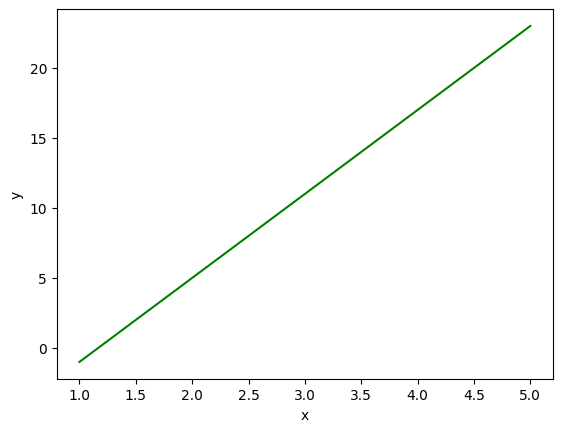

-7.0 6.0


In [29]:
x= np.array([1,2,3,4,5])
y= np.array([1,4,9,16,25])

b0, b1 = estimated_coef(x,y)

b = [b0,b1]

plot_regression_line(x,y,b)

print(b0,b1)

In [30]:
def estimated_coeff1(x,y):
  beta1=0
  beta0=0
  alpha=0.001
  n=np.size(x)
  y_expected=np.zeros(n)
  b=[0,0]
  squared_error = 1.5
  while(squared_error>1):
    for i in range(n):
      y_expected[i] = beta0+beta1*x[i]
      beta0 = beta0 + alpha*(y[i]-y_expected[i])*1
      beta1 = beta1 + alpha*(y[i]-y_expected[i])*x[i]
      b[0] = beta0
      b[1] = beta1
    #plot_regression_line(x,y,b)
    error = y-y_expected
    squared_error = np.sum((error**2))*(1/n)
  print(squared_error)

  return (beta0,beta1)

2. Download Boston Housing Rate Dataset. Analyse the input attributes and find out the  attribute that best follow the linear relationship with the output price. Implement both the  analytic formulation and gradient descent (Full-batch, stochastic) on LMS loss  formulation to compute the coefficients of regression matrix and compare the results.  

In [31]:
import pandas as pd
import seaborn as sns

In [32]:
import pandas as pd

boston_data = pd.read_csv('BostonHousing.csv')




In [33]:
X = boston_data.drop(columns=["medv"]) 
y = boston_data["medv"] 


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=1)

In [35]:
import numpy as np
correlation_coeffs = np.abs(boston_data.corr()["medv"]).drop("medv")
best_feature_name = correlation_coeffs.idxmax()


In [36]:
from sklearn.preprocessing import StandardScaler

print(f"The attribute that best follows the linear relationship with the output price is: {best_feature_name}")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_with_bias = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]
analytic_solution = np.linalg.inv(X_with_bias.T.dot(X_with_bias)).dot(X_with_bias.T).dot(y)


The attribute that best follows the linear relationship with the output price is: lstat


In [37]:
print("Analytic solution coefficients:", analytic_solution)
class LinearRegressionGradientDescent:
    def _init_(self, lr=0.0001, max_iter=10000, tolerance=1e-6):
        self.lr = lr
        self.max_iter = max_iter
        self.tolerance = tolerance


Analytic solution coefficients: [ 2.25328063e+01 -9.28146064e-01  1.08156863e+00  1.40899997e-01
  6.81739725e-01 -2.05671827e+00  2.67423017e+00  1.94660717e-02
 -3.10404426e+00  2.66221764e+00 -2.07678168e+00 -2.06060666e+00
  8.49268418e-01 -3.74362713e+00]


In [38]:
    def fit(self, X, y):
        X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]
        self.weights = np.zeros(X_with_bias.shape[1])
        for _ in range(self.max_iter):
            gradients = -2 * X_with_bias.T.dot(y - X_with_bias.dot(self.weights))
            if np.all(np.abs(gradients) < self.tolerance):
                break
            self.weights -= self.lr * gradients



In [39]:
class LinearRegressionGradientDescent:
    def __init__(self, lr=0.0001, max_iter=10000, tolerance=1e-6):
        self.lr = lr
        self.max_iter = max_iter
        self.tolerance = tolerance

    def fit(self, X, y):
        X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]
        self.weights = np.zeros(X_with_bias.shape[1])
        for _ in range(self.max_iter):
            gradients = -2 * X_with_bias.T.dot(y - X_with_bias.dot(self.weights))
            if np.all(np.abs(gradients) < self.tolerance):
                break
            self.weights -= self.lr * gradients

    def predict(self, X):
        X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]
        return X_with_bias.dot(self.weights)

lr_full_batch_scaled = LinearRegressionGradientDescent(lr=0.0001, max_iter=10000)
lr_full_batch_scaled.fit(X_scaled, y)


In [40]:

print("Gradient descent (Full-batch) coefficients (scaled features):", lr_full_batch_scaled.weights)
class LinearRegressionStochasticGradientDescent:
    def _init_(self, lr=0.0001, max_iter=1000, tolerance=1e-6, batch_size=1):
        self.lr = lr
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.batch_size = batch_size
    def fit(self, X, y):
        X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]
        self.weights = np.zeros(X_with_bias.shape[1])

        for _ in range(self.max_iter):
            indices = np.random.permutation(X_with_bias.shape[0])
            for start_idx in range(0, X_with_bias.shape[0], self.batch_size):
                batch_indices = indices[start_idx:start_idx + self.batch_size]
                X_batch = X_with_bias[batch_indices]
                y_batch = y[batch_indices]
                gradients = -2 * X_batch.T.dot(y_batch - X_batch.dot(self.weights))
                if np.all(np.abs(gradients) < self.tolerance):
                    break
                self.weights -= self.lr * gradients


Gradient descent (Full-batch) coefficients (scaled features): [ 2.25328063e+01 -9.28146063e-01  1.08156863e+00  1.40899992e-01
  6.81739726e-01 -2.05671827e+00  2.67423017e+00  1.94660708e-02
 -3.10404426e+00  2.66221763e+00 -2.07678167e+00 -2.06060666e+00
  8.49268418e-01 -3.74362713e+00]


In [41]:
class LinearRegressionStochasticGradientDescent:
    def __init__(self, lr=0.0001, max_iter=1000, tolerance=1e-6, batch_size=1):
        self.lr = lr
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.batch_size = batch_size

    def fit(self, X, y):
        X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]
        self.weights = np.zeros(X_with_bias.shape[1])

        for _ in range(self.max_iter):
            indices = np.random.permutation(X_with_bias.shape[0])
            for start_idx in range(0, X_with_bias.shape[0], self.batch_size):
                batch_indices = indices[start_idx:start_idx + self.batch_size]
                X_batch = X_with_bias[batch_indices]
                y_batch = y[batch_indices]
                gradients = -2 * X_batch.T.dot(y_batch - X_batch.dot(self.weights))
                if np.all(np.abs(gradients) < self.tolerance):
                    break
                self.weights -= self.lr * gradients

lr_stochastic_scaled = LinearRegressionStochasticGradientDescent(lr=0.0001, max_iter=10000, batch_size=1)
lr_stochastic_scaled.fit(X_scaled, y)
print("Gradient descent (Stochastic) coefficients (scaled features):", lr_stochastic_scaled.weights)